In [1]:
import string
import natsort
import glob
import numpy as np
import matplotlib.pyplot as plt

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer


# Function for data input
def get_files(pattern):
    """
    Extracts file in alphanumerical order that match the provided pattern
    """
    if isinstance(pattern, list):
        pattern = os.path.join(*pattern)
        
    files = natsort.natsorted(glob.glob(pattern))
    if not files:
        raise FileNotFoundError('Pattern could not detect file(s)')
        
    return files

## Create word cloud from thesis .tex files

In [2]:
# Pattern for .tex files in each chapter:
file_patterns = path.abspath('../chapter*/*.tex')
tex_files = get_files(file_patterns)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read in all the .tex and combine into one large text data
raw_text = ''
for texfile in tex_files:
    tex = open(texfile).read()
    raw_text += "\n" + tex

# Tokenize into individual words:
raw_tokens = word_tokenize(raw_text)
print(f'There are {len(raw_tokens)} words before cleaning up.')

There are 44495 words before cleaning up.


Clean up words:

In [3]:
# Remove non-alphabetic:
words = [word for word in raw_tokens if word.isalpha()]
# Convert to lower case:
words = [w.lower() for w in words]

# remove nltk stop words:
stop_words = set(stopwords.words('english'))
words = [w for w in words if w not in stop_words]
punctuation_mapping = str.maketrans('', '', string.punctuation)
words = [w.translate(punctuation_mapping) for w in words]

# remove latex commands
latex_commands = [
    'cite',
    'textit',
    'frac',
    'centering',
    'includegraphics',
    'caption',
    'figure',
    'label',
    'ref',
    'fig',
    'emph',
    'textbf',
    'propto',
    'e',
    'p',
    'f',
    'et',
    'al',

]
words = [w for w in words if w not in latex_commands]

print(f'There are now {len(words)} words left.')

# combine words back into string:
data = TreebankWordDetokenizer().detokenize(words)
print(f'First few words after cleaning up: {data[:100]}')

There are now 19535 words left.
First few words after cleaning up: introduction study biology often focused development actions individual structural functional units 


Generate word cloud with mask:

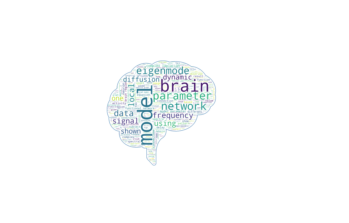

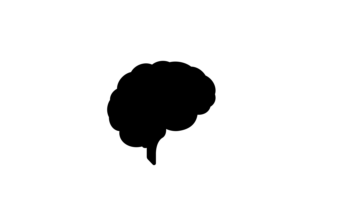

In [4]:
# mask image:
brain_mask = np.array(Image.open(path.join(d, 'brain-mask.png')))

stopwords = set(STOPWORDS)

# 
wc = WordCloud(background_color="white", max_words=500, mask=brain_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(data)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(brain_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
wc.to_file(path.join(d, "brain_thesis.png"))